# Tarea 2

Adaya Isui Escobar Fortis 198054

### 1. [Introducción] Como primer paso en tu análisis, debes proporcionar un panorama general de las variables recopiladas por la ENIGH 2020. Esta revisión inicial te ayudará a formar una comprensión básica de los distintos factores que podrían influir en la seguridad alimentaria en los hogares mexicanos, estableciendo una sólida base para tu reporte.

- (a) La base de datos incluye a las variables gasto mon que representa el gasto corriente monetario total, y alimentos que representa el gasto total en alimentos dentro del hogar. Al gobierno le interesa conocer la proporción de gasto que los hogares mexicanos dirigen hacia la alimentación. Crea la variable prop alimen que represente la proporción mencionada. Haz una gráfica que muestre la distribución de la variable que creaste para cada estrato socio-económico (capturadoen la variable est socio) y proporciona una breve descripción de los hallazgos.

In [93]:
head(datos)

,folioviv,ubica_geo,tam_loc,est_socio,ing_cor,sexo_jefe,tot_integ,mujeres,menores,p65mas,⋯,prop_mujeres,prop_menores,prop_p65mas,prop_alimen,alimentos_pc,log_alimentos_pc,log_alimentos,est_socio2,est_socio3,est_socio4
,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,100013605,1001,1,3,1.622949,2,3,2,0,0,⋯,0.6666667,0.00,0,0.5982610,4910.933,8.499219,9.597832,0,1,0
2,100013606,1001,1,3,3.142568,1,4,1,1,0,⋯,0.2500000,0.25,0,0.4569924,2330.330,7.753765,9.140060,0,1,0
3,100017801,1001,1,3,3.397916,1,2,1,0,0,⋯,0.5000000,0.00,0,0.3354705,7540.660,8.928065,9.621212,0,1,0
4,100017802,1001,1,3,7.155737,1,2,0,1,0,⋯,0.0000000,0.50,0,0.3245497,13460.765,9.507534,10.200682,0,1,0
5,100017803,1001,1,3,9.070326,1,2,1,0,0,⋯,0.5000000,0.00,0,0.3971354,5984.965,8.697006,9.390153,0,1,0
6,100017804,1001,1,3,3.036884,1,4,2,2,0,⋯,0.5000000,0.50,0,0.1887138,1886.757,7.542615,8.928909,0,1,0


[1] 0.5982610 0.4569924 0.3354705 0.3245497 0.3971354 0.1887138

Warning message:
"Removed 104 rows containing non-finite values (`stat_boxplot()`)."


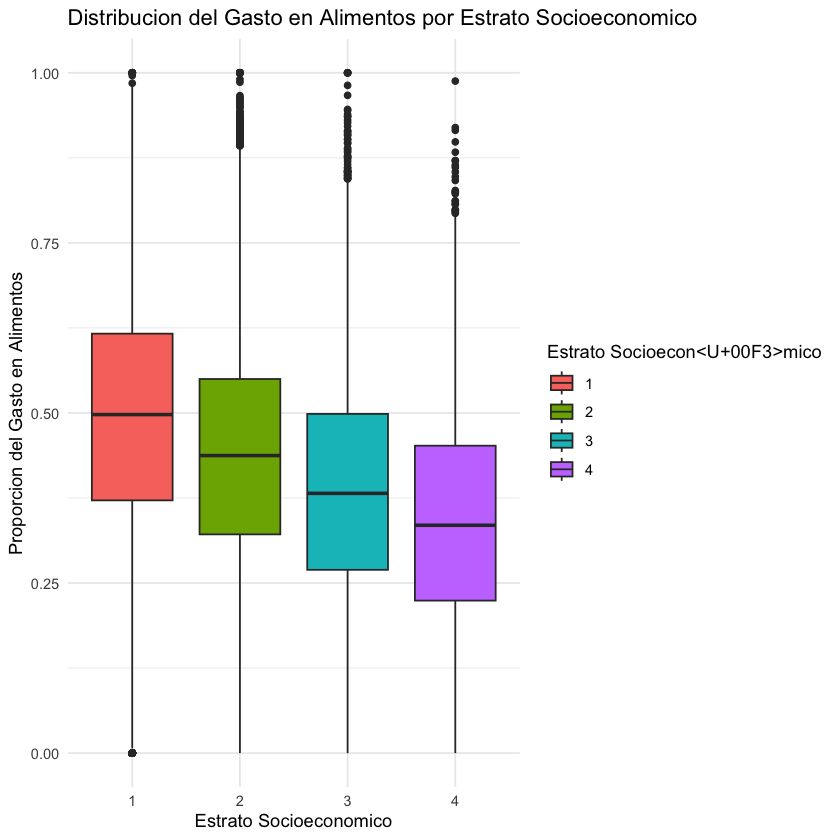

In [56]:
datos$prop_alimen <- datos$alimentos / datos$gasto_mon
head(datos$prop_alimen)

library(ggplot2)
ggplot(datos, aes(x = factor(est_socio), y = prop_alimen, fill = as.factor(est_socio))) +
  geom_boxplot() +
  labs(x = "Estrato Socioeconomico", y = "Proporcion del Gasto en Alimentos", title = "Distribucion del Gasto en Alimentos por Estrato Socioeconomico", fill = "Estrato Socioeconómico") +
  theme_minimal()


In [15]:
media_por_estrato <- aggregate(prop_alimen ~ est_socio, data = datos, FUN = mean)

varianza_por_estrato <- aggregate(prop_alimen ~ est_socio, data = datos, FUN = var)

print(media_por_estrato)
print(varianza_por_estrato)


  est_socio prop_alimen
1         1   0.4902750
2         2   0.4353529
3         3   0.3864001
4         4   0.3426657
  est_socio prop_alimen
1         1  0.03206113
2         2  0.02743773
3         3  0.02670024
4         4  0.02583838


El gráfico sugiere que mientras más bajo es el estrato socioeconómico, mayor es la proporción del gasto total que se destina a los alimentos, lo cual podría indicar que los hogares con menos recursos económicos necesitan dedicar una mayor parte de su gasto a la alimentación. Esto es consistente con la teoría económica que sugiere que los hogares con ingresos más bajos tienden a gastar una mayor proporción de sus ingresos en bienes de primera necesidad, como alimentos.

- (b) Al representante del gobierno que te contrato también le interesa conocer el gasto dirigido a la alimentación per cápita. Utiliza las variables alimentos y tot integ. Crea una variable adicional alimentos pc que capture esta información e igual haz una gráfica que muestre la distribución de esta variable para cada estrato socio-económico. Proporciona una breve descripción de los hallazgos. [NOTA: notarás que la variable presenta una distribución sesgada con colas largas hacia valores más altos. La transformación logarítmica ayuda a normalizar estos datos y reduce la influencia de los valores atípicos]

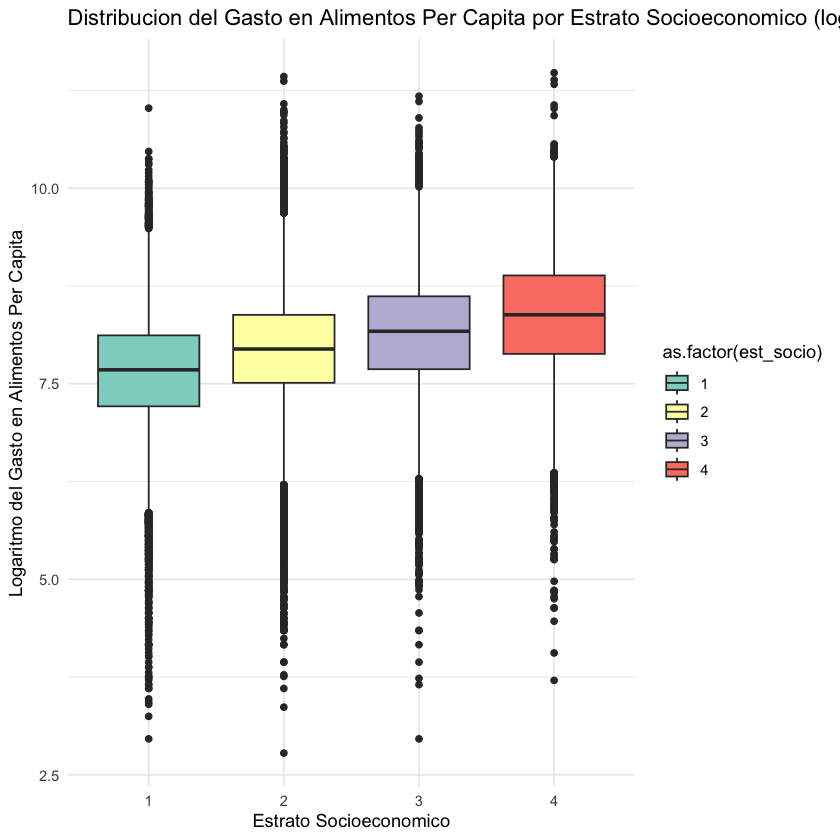

In [60]:
library(ggplot2)
datos <- datos %>% filter(alimentos_pc > 0)
datos$log_alimentos_pc <- log(datos$alimentos_pc)

ggplot(datos, aes(x = as.factor(est_socio), y = log_alimentos_pc, fill = as.factor(est_socio))) +
  geom_boxplot() +
  labs(title = "Distribucion del Gasto en Alimentos Per Capita por Estrato Socioeconomico (log)",
       x = "Estrato Socioeconomico",
       y = "Logaritmo del Gasto en Alimentos Per Capita") +
  theme_minimal() +
  scale_fill_brewer(palette = "Set3") 



El gráfico de caja muestra que los hogares en el estrato socioeconómico más bajo tienden a gastar una mayor proporción de sus ingresos en alimentos, como lo indica la mediana más alta de gasto en alimentos per cápita. A medida que aumenta el estrato socioeconómico, la mediana disminuye ligeramente, sugiriendo un menor gasto relativo en alimentos. Sin embargo, hay una variabilidad significativa dentro de cada estrato, reflejada en los rangos intercuartilicos y en la presencia de valores atípicos. Estos hallazgos sugieren que, aunque la capacidad económica influye en el gasto alimentario, otros factores también juegan un rol importante en las decisiones de gasto de los hogares.

- (c) Se te solicita crear una tabla con estadísticas descriptivas básicas con todas las variables disponibles en la base de datos [Nota: solo no debes incluir las variables folioviv y ubica geo]. Sí debes de incluir todas las otras variables de la base de datos y, adicionalmente, las variables de interés que creaste en inciso 1(a) y 1(b). La tabla debe incluir el número de observaciones, la media, la desviación estándar, los valores mínimos y máximos para cada variable. Si alguna de las variables es de tipo dummy señálalo de alguna forma en la tabla. Tal vez deberás transformar algunas variables para realizar el análisis descriptivo de forma que tenga sentido. [R tip: Para hacer la tabla puedes usar el comando stargazer].

In [66]:
variables_dummy <- c("urbano")

library(stargazer)

# Crear las notas para el pie de la tabla identificando las variables dummy
notas_dummy <- lapply(variables_dummy, function(v) c(v, "Dummy variable"))

# Crear la tabla de estadísticas descriptivas
stargazer(data_descriptive, type = "text",
          summary.stat = c("n", "mean", "sd", "min", "max"),
          title = "Estadisticas Descriptivas de las Variables",
          add.lines = notas_dummy)




Estadisticas Descriptivas de las Variables
Statistic          N       Mean     St. Dev.    Min        Max     
-------------------------------------------------------------------
tam_loc          88,242   2.520      1.315       1          4      
est_socio        88,242   2.071      0.813       1          4      
ing_cor          88,242   4.785      7.014     0.000    1,070.211  
sexo_jefe        88,242   1.288      0.453       1          2      
tot_integ        88,242   3.559      1.811       1         25      
mujeres          88,242   1.827      1.188       0         12      
menores          88,242   0.694      0.971       0         14      
p65mas           88,242   0.330      0.620       0          4      
gasto_mon        88,242 28,387.160 25,578.240 128.570 1,007,112.000
alimentos        88,242 10,876.910 7,786.486  38.570   263,790.900 
urbano           88,242   0.624      0.484       0          1      
prop_mujeres     88,242   0.509      0.252     0.000      1.000    
prop

### 2. [Estrato socioeconómico] De acuerdo con observaciones preliminares y estudios socioeconómicos previos, existe la intuición de que los estratos socioeconómicos más bajos podrían destinar una mayor proporción de su gasto total a la alimentación, reflejando potencialmente diferencias en calidad, variedad o preferencias alimenticias. Este análisis nos permitirá comprender mejor cómo la posición socioeconómica influye en los patrones de consumo alimentario y si realmente se verifica que los estratos más bajos invierten proporcionalmente más en su alimentación en comparación con los estratos más altos. Modifica tu data frame para quedarte únicamente con las viviendas con ingreso trimestral promedio menor a 1,000,000 de pesos (utiliza esta base de datos para lo que resta de la tarea). NOTA: Para la modificación de tu data frame y para la interpretación de la variable ing cor toma en cuenta que esta variable ha sido escalada dividiéndola por 10,000.

- (a) Haz dos gráficas: primero, una que ilustre la relación entre el ingreso corriente y la proporción de gasto en alimentos distinguiendo entre estratos socioeconómicos;segundo, una que ilustre la relación entre el ingreso corriente y el gasto en alimentos por integrante de la vivienda distinguiendo entre estratos socioeconómicos.

`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 104 rows containing non-finite values (`stat_smooth()`)."
Warning message:
"Removed 104 rows containing missing values (`geom_point()`)."


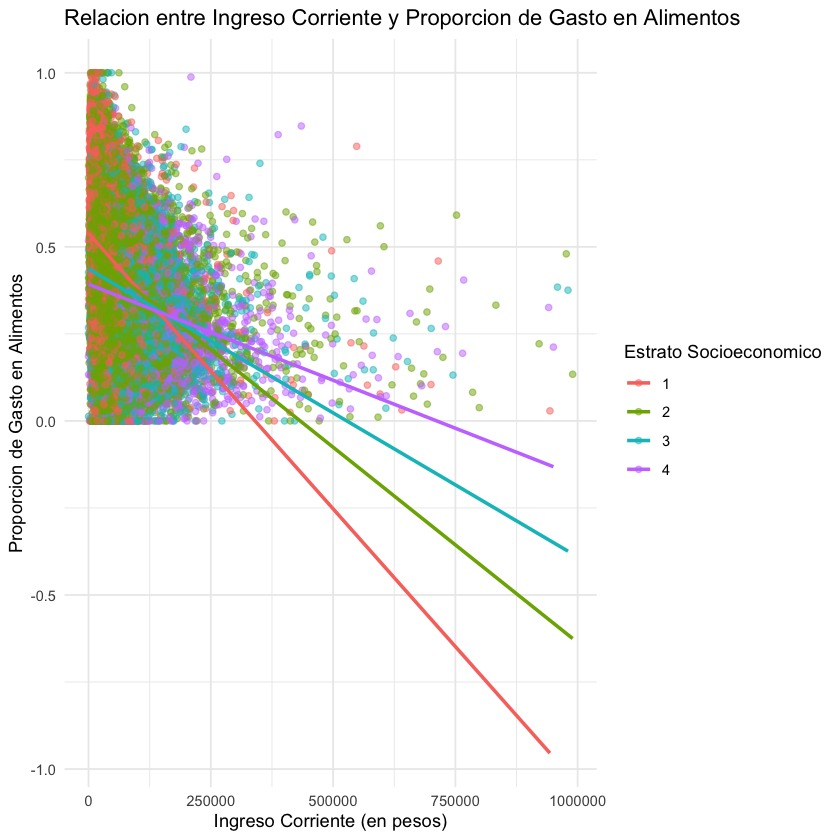

In [38]:
data_filtered <- datos %>% 
  filter(ing_cor * 10000 < 1000000)

ggplot(data_filtered, aes(x = ing_cor * 10000, y = prop_alimen, color = as.factor(est_socio))) +
  geom_point(alpha = 0.5) +
  geom_smooth(method = "lm", se = FALSE) +
  labs(title = "Relacion entre Ingreso Corriente y Proporcion de Gasto en Alimentos",
       x = "Ingreso Corriente (en pesos)",
       y = "Proporcion de Gasto en Alimentos",
       color = "Estrato Socioeconomico") +
  theme_minimal()


`geom_smooth()` using formula = 'y ~ x'


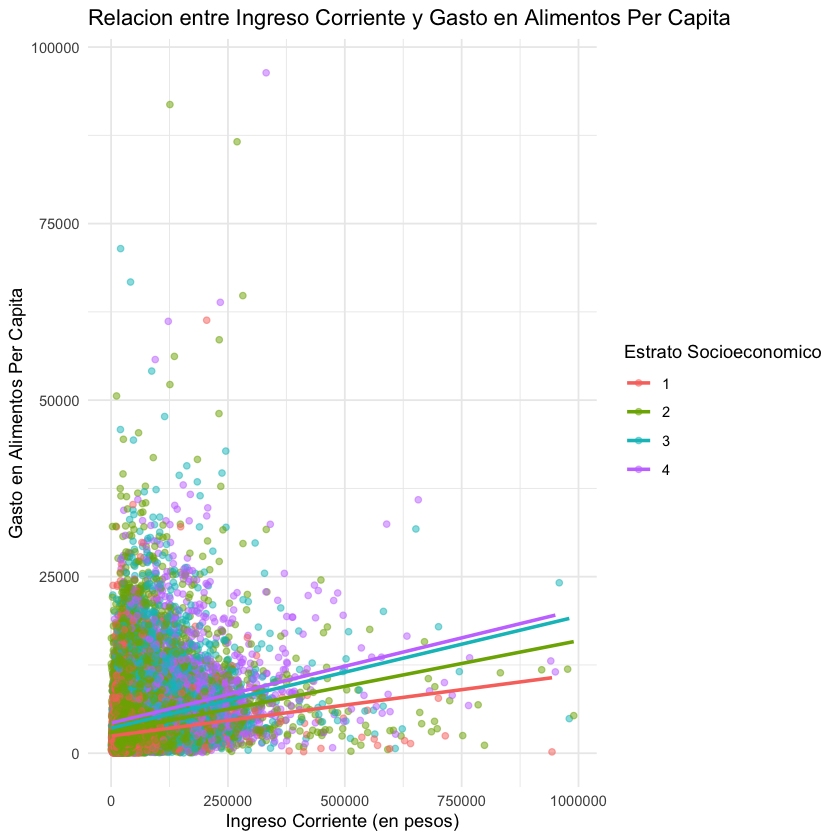

In [67]:
ggplot(data_filtered, aes(x = ing_cor * 10000, y = alimentos_pc, color = as.factor(est_socio))) +
  geom_point(alpha = 0.5) +
  geom_smooth(method = "lm", se = FALSE) +
  labs(title = "Relacion entre Ingreso Corriente y Gasto en Alimentos Per Capita",
       x = "Ingreso Corriente (en pesos)",
       y = "Gasto en Alimentos Per Capita",
       color = "Estrato Socioeconomico") +
  theme_minimal()


Las gráficas muestran una relación negativa entre el ingreso corriente y la proporción de gasto en alimentos, donde hogares con mayores ingresos dedican una menor proporción de su gasto a alimentos, independientemente del estrato socioeconómico. En contraste, la relación entre el ingreso corriente y el gasto en alimentos per cápita es positiva, indicando que hogares con mayores ingresos tienden a gastar más en alimentos por persona.

- (b) Te propones analizar con mayor detalle la relación entre el ingreso corriente y las variables prop alimen y alimento pc por lo que te interesa estimar la siguientes especificaciones: prop alimeni = β0 + β1log(ing cori) + Ui, log(alimento pci) = β0 + β1log(ing cori) + Ui Lleva a cabo estas estimaciones y muéstralas junto con un diagrama de dispersión. Al final de la tarea viene una ilustración para ejemplificar cómo debes reportar tu resultado.

In [68]:
data_filtered <- data_filtered %>% 
  filter(!is.na(ing_cor), ing_cor > 0)

data_filtered <- data_filtered %>% 
  filter(!is.na(log_alimentos_pc), log_alimentos_pc > 0)

data_filtered$log_ing_cor <- log(data_filtered$ing_cor)
data_filtered$log_alimentos_pc <- log(data_filtered$alimentos_pc)
data_filtered <- na.omit(data_filtered)

lm_prop_alimen <- lm(prop_alimen ~ log_ing_cor, data = data_filtered)
lm_alimentos_pc <- lm(log_alimentos_pc ~ log_ing_cor, data = data_filtered)


Las gráficas:

`geom_smooth()` using formula = 'y ~ x'


`geom_smooth()` using formula = 'y ~ x'


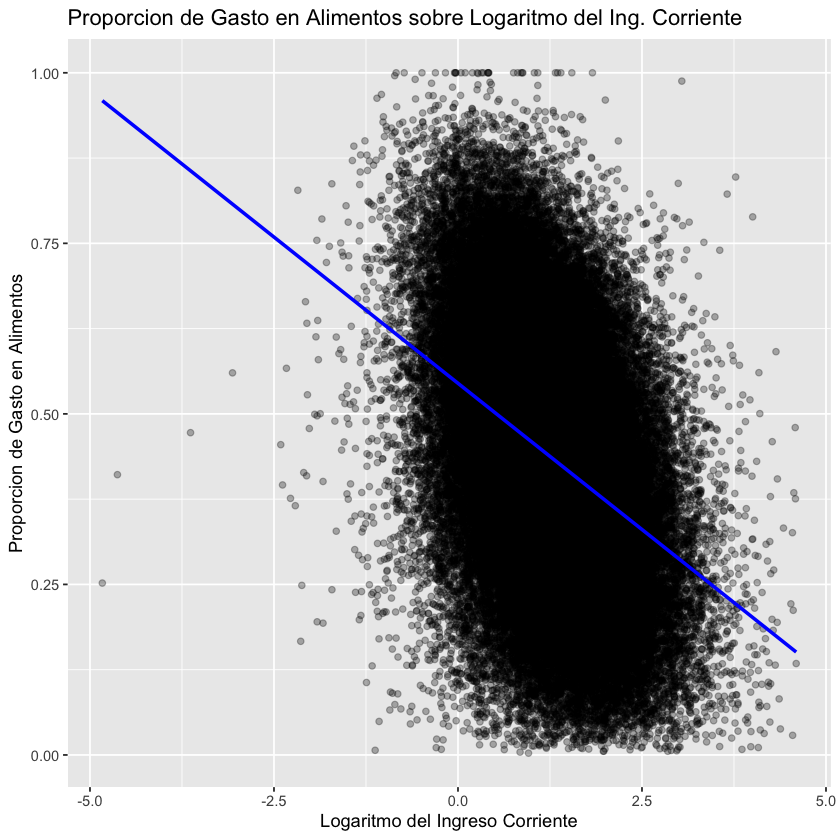

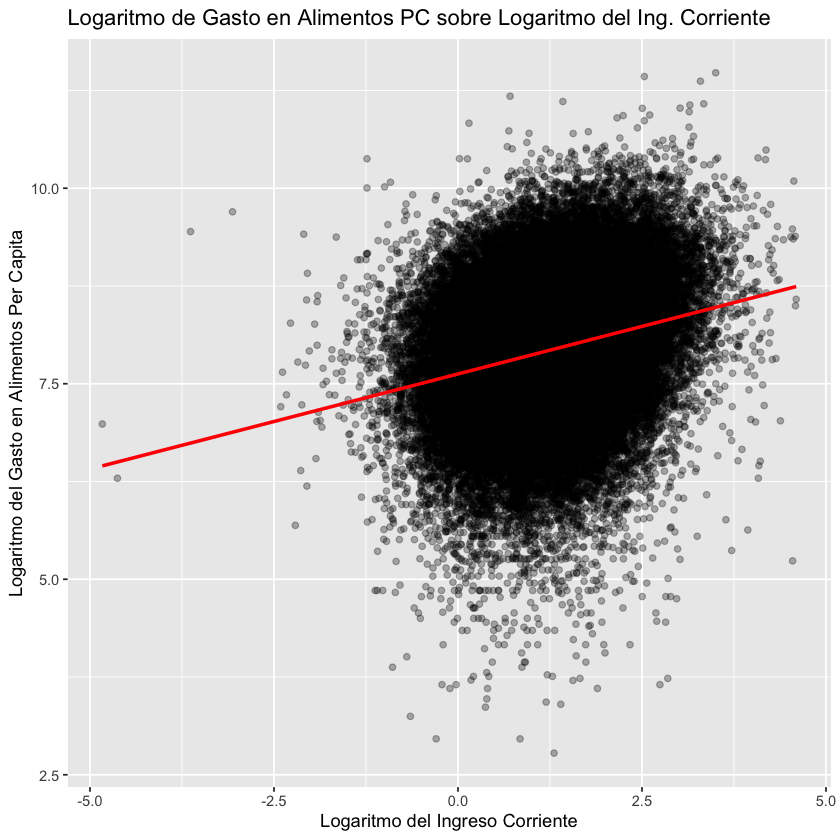

In [135]:
library(ggplot2)

# Diagrama de dispersión para la regresión de prop_alimen sobre log(ing_cor)
ggplot(data_filtered, aes(x = log_ing_cor, y = prop_alimen)) +
  geom_point(alpha = 0.3) +
  geom_smooth(method = "lm", se = FALSE, color = "blue") +
  labs(title = "Proporcion de Gasto en Alimentos sobre Logaritmo del Ing. Corriente",
       x = "Logaritmo del Ingreso Corriente",
       y = "Proporcion de Gasto en Alimentos")

# Diagrama de dispersión para la regresión de log(alimentos_pc) sobre log(ing_cor)
ggplot(data_filtered, aes(x = log_ing_cor, y = log_alimentos_pc)) +
  geom_point(alpha = 0.3) +
  geom_smooth(method = "lm", se = FALSE, color = "red") +
  labs(title = "Logaritmo de Gasto en Alimentos PC sobre Logaritmo del Ing. Corriente",
       x = "Logaritmo del Ingreso Corriente",
       y = "Logaritmo del Gasto en Alimentos Per Capita")

- (c) Te propones analizar con mayor detalle la relación entre el estrato socioeconómico y las variables prop alimen y alimento pc. Realiza una regresión donde prop alimen i sea la variable dependiente y est socio la variable explicativa. Reflexiona sobre el uso adecuado de la variable explicativa y la posible necesidad de agregar variables adicionales para capturar su efecto correctamente. Posteriormente, repite el proceso de análisis utilizando el logaritmo de alimento pc como variable dependiente. Reporta los resultados de tus estimaciones con un formato de ecuación [Nota: al final de la tarea viene un ejemplo de como reportar los resultados con formato de ecuación]

In [70]:
library(broom)
lm_est_socio_prop <- lm(prop_alimen ~ as.factor(est_socio), data = data_filtered)
lm_est_socio_alim_pc <- lm(log_alimentos_pc ~ as.factor(est_socio), data = data_filtered)

tidy_lm_est_socio_prop <- tidy(lm_est_socio_prop)
tidy_lm_est_socio_alim_pc <- tidy(lm_est_socio_alim_pc)
format_equation <- function(tidy_model) {
  equation <- "y_i = "
  for (i in 1:nrow(tidy_model)) {
    term <- tidy_model$term[i]
    estimate <- tidy_model$estimate[i]
    std.error <- tidy_model$std.error[i]
    if (term == "(Intercept)") {
      equation <- paste0(equation, round(estimate, 4), " ")
    } else {
      sign <- ifelse(estimate >= 0, "+ ", "- ")
      equation <- paste0(equation, sign, round(abs(estimate), 4), " * ", term, " ")
    }
  }
  return(equation)
}

equation_prop_alimen <- format_equation(tidy_lm_est_socio_prop)
equation_log_alim_pc <- format_equation(tidy_lm_est_socio_alim_pc)
cat("Modelo para prop_alimen:\n", equation_prop_alimen, "\n")
cat("Modelo para log_alimentos_pc:\n", equation_log_alim_pc, "\n")


Modelo para prop_alimen:
 y_i = 0.4954 - 0.0573 * as.factor(est_socio)2 - 0.1063 * as.factor(est_socio)3 - 0.1494 * as.factor(est_socio)4  
Modelo para log_alimentos_pc:
 y_i = 7.6427 + 0.2947 * as.factor(est_socio)2 + 0.4966 * as.factor(est_socio)3 + 0.7139 * as.factor(est_socio)4  


La relación entre el estrato socioeconómico y las variables prop_alimen y alimentos_pc es una que probablemente se verá influenciada por diversos factores más allá del ingreso o la categorización socioeconómica. Al utilizar únicamente est_socio como variable explicativa, podríamos estar omitiendo variables importantes que también afectan la proporción del gasto en alimentos o el gasto en alimentos per cápita. Por ejemplo, el número de personas por casa, la zona en la que viven, la educación del proveedor de la familia y las preferencias culturales pueden jugar un papel importante en la distribución de gastos.

Al usar solo el estrato socioeconómico como variable explicativa, la regresión podría captar no solo el efecto del estrato en sí, sino también el efecto mezclado de todas estas otras variables no observadas que están correlacionadas con el estrato socioeconómico. Esto puede llevar a una sobreestimación o subestimación del efecto real del estrato socioeconómico en la proporción del gasto en alimentos.

(d) Utiliza los resultados de las preguntas 1(a) y 1(b) para argumentar el uso de errores homocedásticos o heterocedásticos en la regresión del inciso (c). No vuelvas a
hacer la regresión. Solo ajusta el resultado del inciso anterior de forma adecuada y como respuesta a esta pregunta incluye la reflexión que llevaste a cabo con las
preguntas 1(a) y 1(b) para decidir el tipo de errores a utilizar.

Observando la primera gráfica, parece que hay una variabilidad considerable en la proporción del gasto en alimentos dentro de cada estrato, con una disminución general en la mediana a medida que aumenta el nivel socioeconómico. Además, la presencia de valores atípicos, particularmente en los estratos más bajos, sugiere una posible heterocedasticidad. En la segunda gráfica, la variabilidad del logaritmo del gasto en alimentos per cápita también parece cambiar con los estratos socioeconómicos, lo que se manifiesta en la longitud de los bigotes y la cantidad de valores atípicos. Esto reafirma la sospecha de heterocedasticidad en la relación entre el ingreso y el gasto en alimentos per cápita.

Ambos hallazgos respaldan la elección de utilizar errores estándar robustos (heterocedásticos) en las regresiones del inciso (c). Estos ajustarían los errores estándar de los estimadores para dar cuenta de la heterogeneidad en la varianza de los errores, llevando a inferencias más precisas y confiables sobre los efectos del estrato socioeconómico en la proporción de gasto en alimentos y en el gasto de alimentos per cápita.

### 3. [Análisis] En esta sección de análisis, profundizaremos en el estudio de las variables que pueden influir en la proporción del gasto destinado a alimentos en los hogares mexicanos y el gasto per cápita en alimentos.

- (a) Para analizar la relación entre las características sociodemográficas y el gasto en alimentos, se deberán realizar las estimaciones presentadas en la Tabla 1. En la tabla notarás dummies para cada estrato socioeconómico donde est socio2 = 1 si el hogar pertenece al estrato socioeconómico 2 y est socio2 = 0 si el hogar pertenece a cualquier otro estrato socioeconómico. Lo mismo para est socio3 y est socio4. Los coeficientes estimados en la tabla deben venir acompañados de asteriscos para indicar su nivel de significancia estadística, de la siguiente manera: * para el 10 %, ** para el 5 % y *** para el 1 %. Deberás emplear errores heterocedásticos para tus estimaciones. [Tip de R: para correr una regresión, utiliza el comando lm. Para producir las tablas, usa el paquete stargazer] Ojo: Las líneas horizontales en algunas variables (—) significan que NO debes incluir esta variable en la estimación de dicha columna.

In [125]:
library(dplyr)

datos <- datos %>%
  filter(complete.cases(est_socio, prop_alimen, alimentos_pc, urbano, tot_integ, prop_menores, prop_p65mas, sexo_jefe, ing_cor, prop_mujeres))

variables <- c("prop_alimen", "alimentos_pc", "ing_cor")
datos <- datos %>%
  filter(!is.infinite(ing_cor)) %>%
  filter(ing_cor != 0, alimentos_pc != 0)

datos$est_socio2 <- as.numeric(datos$est_socio == 2)
datos$est_socio3 <- as.numeric(datos$est_socio == 3)
datos$est_socio4 <- as.numeric(datos$est_socio == 4)

datos <- na.omit(datos)
model1 <- lm(prop_alimen ~ est_socio2 + est_socio3 + est_socio4 + urbano + tot_integ + prop_mujeres + prop_menores + prop_p65mas, data = datos)
model2 <- lm(prop_alimen ~ log(ing_cor)+ urbano + tot_integ + prop_menores + prop_p65mas + sexo_jefe, data = datos)
model3 <- lm(alimentos_pc ~  est_socio2 + est_socio3 + est_socio4 + urbano + tot_integ + prop_mujeres + prop_menores + prop_p65mas, data = datos)
model4 <- lm(alimentos_pc ~ log(ing_cor)+ urbano + tot_integ + prop_menores + prop_p65mas + sexo_jefe, data = datos)
model5 <- lm(log(alimentos_pc) ~ est_socio2 + est_socio3 + est_socio4 + urbano + tot_integ + prop_mujeres + prop_menores + prop_p65mas, data = datos)
model6 <- lm(log(alimentos_pc) ~ log(ing_cor)+ urbano + tot_integ + prop_menores + prop_p65mas + sexo_jefe, data = datos)


robust_se_values <- sqrt(diag(vcovHC(model1, type = "HC1")))
robust_se_values2 <- sqrt(diag(vcovHC(model2, type = "HC1")))
robust_se_values3 <- sqrt(diag(vcovHC(model3, type = "HC1")))
robust_se_values4 <- sqrt(diag(vcovHC(model4, type = "HC1")))
robust_se_values5 <- sqrt(diag(vcovHC(model5, type = "HC1")))
robust_se_values6 <- sqrt(diag(vcovHC(model6, type = "HC1")))


stargazer(model1,model2, model3, model4, model5, model6, type = "latex",
          se = list(robust_se_values, robust_se_values2, robust_se_values3, robust_se_values4, robust_se_values5, robust_se_values6), 
         star.cutoffs = c(0.1, 0.05, 0.01)) 





% Table created by stargazer v.5.2.3 by Marek Hlavac, Social Policy Institute. E-mail: marek.hlavac at gmail.com
% Date and time: Tue, Apr 09, 2024 - 04:36:14
\begin{table}[!htbp] \centering 
  \caption{} 
  \label{} 
\begin{tabular}{@{\extracolsep{5pt}}lcccccc} 
\\[-1.8ex]\hline 
\hline \\[-1.8ex] 
 & \multicolumn{6}{c}{\textit{Dependent variable:}} \\ 
\cline{2-7} 
\\[-1.8ex] & \multicolumn{2}{c}{prop\_alimen} & \multicolumn{2}{c}{alimentos\_pc} & \multicolumn{2}{c}{log(alimentos\_pc)} \\ 
\\[-1.8ex] & (1) & (2) & (3) & (4) & (5) & (6)\\ 
\hline \\[-1.8ex] 
 est\_socio2 & $-$0.057$^{***}$ &  & 583.670$^{***}$ &  & 0.208$^{***}$ &  \\ 
  & (0.002) &  & (22.961) &  & (0.006) &  \\ 
  & & & & & & \\ 
 est\_socio3 & $-$0.108$^{***}$ &  & 1,233.459$^{***}$ &  & 0.333$^{***}$ &  \\ 
  & (0.002) &  & (37.664) &  & (0.009) &  \\ 
  & & & & & & \\ 
 est\_socio4 & $-$0.150$^{***}$ &  & 2,390.634$^{***}$ &  & 0.528$^{***}$ &  \\ 
  & (0.003) &  & (69.178) &  & (0.012) &  \\ 
  & & & & & & \\ 


![tabla](equation.png)

- (b) Interpreta de manera específica los coeficientes de las siguientes variables de la
tabla:


(i) β0 en la columna (3): Representa el gasto en alimentos per cápita cuando todas las variables independientes son cero. Es el intercepto, aquí 6,103.020***, indicando un nivel base significativo de gasto en alimentos per cápita.

(ii) urbano en la columna (5): El coeficiente de 0.072*** sugiere que, manteniendo constante todo lo demás, los hogares urbanos gastan un 7.2% más de sus ingresos en alimentos que los hogares rurales.

(iii) pop mujeres en la columna (1): El coeficiente de -0.022*** implica que un aumento en la proporción de mujeres en el hogar está asociado con una disminución del 2.2% en la proporción del gasto en alimentos.


(iv) sexo jefe en la columna (4):  Si el coeficiente es -236.42***, esta cifra nos dice que, manteniendo todas las demás variables constantes (ceteris paribus), los hogares con un jefe masculino gastan en promedio 236.42 pesos menos en alimentos per cápita que los hogares con una jefa femenina.


(v) est socio4 en la columna (1): Con un coeficiente de -0.150***, indica que los hogares en el estrato socioeconómico 4 gastan un 15% menos de su ingreso en alimentos comparado con el estrato de referencia.


(vi) prop menores en la columna (5): El coeficiente de -0.376*** sugiere que un aumento en la proporción de menores en el hogar está asociado con una disminución del 37.6% en la proporción del gasto en alimentos.


(vii) prop p65mas en la columna (6): Un coeficiente de -0.195*** nos habla sobre como un aumento en la proporción de personas mayores de 65 años está asociado con una disminución del 19.5% en el logaritmo del gasto en alimentos per cápita


(viii) est socio4 en la columna (5): El coeficiente de 0.528*** muestra que los hogares en el estrato socioeconómico 4 tienen un logaritmo de gasto en alimentos per cápita significativamente mayor, un 52.8% más que el estrato de referencia.

(ix) ln(ing cor) en la columna (2): Un coeficiente de -0.088*** explica que un aumento de 1% en el ingreso corriente está asociado con una disminución del 8.8% en la proporción del gasto en alimentos.

(x) ln(ing cor) en la columna (6):  El coeficiente de 0.340*** dice que un aumento de 1% en el ingreso corriente está relacionado con un aumento del 34% en el logaritmo del gasto en alimentos per cápita

(xi) urbano en la columna (4): Si el coeficiente es 277.791***, interpretamos que, manteniendo todas las demás variables constantes, los hogares urbanos gastan en promedio 277.791 pesos más en alimentos per cápita que los hogares rurales.

(xii) tot integ en la columna (5):  El coeficiente de -0.150*** sugiere que un aumento en el número de integrantes por hogar está asociado con una disminución del 15% en la proporción del gasto en alimentos.

(xiii) ln(ing cor) en la columna (4):  Con un coeficiente de 1,430.783***, esto indica que un aumento de 1% en el ingreso corriente está asociado con un aumento de 1,430.783 unidades en el gasto en alimentos per cápita, manteniendo todas las demás variables constantes.

- (c) En la especificación de la columna (5) notarás que se incluye como variable de control urbano, que, de acuerdo a la teoría económica, podría influir en la proporción de gasto en alimentos debido a diferencias en acceso a mercados y opciones de alimentos. Describe qué tipo de sesgo se hubiera producido de no incluir la variable urbano sobre el coeficiente de las variables relacionadas a est socio. Estima la regresión auxiliar que te permitiría deducir el sesgo del coeficiente est socio que hubiera existido en la estimación de la columna (5) de no haber incluido urbano. Reporta esta regresión con formato de ecuación. ¿Puedes calcular el coeficiente de est socio que hubieras obtenido en la especificación (5) de no haber incluido urbano utilizando la columna (5) y la regresión auxiliar? De ser así, hazlo. Si no puedes, indica qué información te hace falta.

Si la variable urbano no se incluyera en la especificación de la columna (5) que examina la relación entre el estrato socioeconómico y la proporción del gasto en alimentos, podría producirse un sesgo de omisión de variables. Esto se debe a que la variable urbano podría estar correlacionada tanto con el estrato socioeconómico (est_socio) como con la proporción del gasto en alimentos. Si urbano está correlacionado con est_socio y también afecta la proporción del gasto en alimentos, omitirla del modelo haría que parte del efecto de urbano se atribuyera erróneamente a las variables est_socio. Esto podría llevar a sobreestimar o subestimar el impacto real de est_socio en la proporción del gasto en alimentos.

In [98]:

reg_auxiliar <- lm(urbano ~ est_socio2 + est_socio3 + est_socio4, data = datos)
tidy_reg_auxiliar <- tidy(reg_auxiliar)

equation <- paste("urbano = ", round(tidy_reg_auxiliar$estimate[1], 4))
for (i in 2:nrow(tidy_reg_auxiliar)) {
  coef <- round(tidy_reg_auxiliar$estimate[i], 4)
  variable <- tidy_reg_auxiliar$term[i]
  sign <- ifelse(coef >= 0, "+", "-")
  equation <- paste(equation, sign, abs(coef), "*", variable)
}
print(equation)


[1] "urbano =  0.1426 + 0.5244 * est_socio2 + 0.8574 * est_socio3 + 0.8528 * est_socio4"


Para calcular el efecto estimado de est_socio en la especificación (5) sin la variable urbano, necesitaríamos estimar la correlación entre urbano y est_socio, y cómo urbano afecta la variable dependiente en la especificación (5). Sin embargo, con los datos y análisis típicos, no podemos calcular directamente este efecto ajustado sin urbano solo con la información proporcionada. Necesitaríamos tener datos adicionales para estimar cómo cambia el efecto de est_socio al excluir urbano.

Para determinar con precisión el coeficiente de est_socio sin urbano, requerimos más que una simple regresión lineal; necesitaríamos un enfoque que considere explícitamente la omisión de variables y su impacto en los coeficientes estimados.

### 4. [Alerta] La región con mayor costo de una dieta saludable en 2020 fue América Latina y el Caribe (3.89 dólares por persona y día) de acuerdo con la Organización de las Naciones Unidas para la Alimentación y la Agricultura en su publicación: EL ESTADO DE LA SEGURIDAD ALIMENTARIA Y LA NUTRICION EN EL MUNDO 2022 [1]. Asumiendo que el periodo trimestral es de 90 días y el tipo de cambio promedio en el 2020 fue de 21.48, el costo de una dieta saludable por persona sería de 7520.148 pesos. Crea una variable dummy que sea 1 si alimento por persona al dia es menor al numero establecido por la FAO y 0 si es igual o mayor.

- (a) Haz una gráfica que muestre la media de la variable alerta para cada estrato socioeconómico y comenta tus hallazgos.

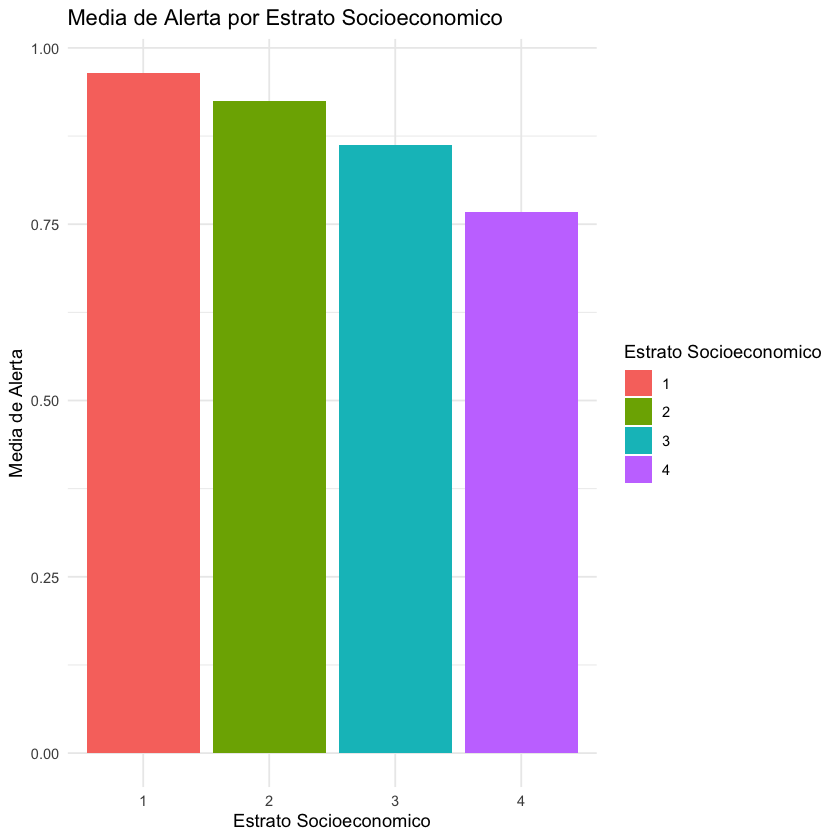

In [102]:
umbral_fao <- 3.89 * 21.48 * 90

data_filtered$alerta <- ifelse(data_filtered$alimentos_pc  < umbral_fao, 1, 0)

data_filtered %>%
  group_by(est_socio) %>%
  summarise(mean_alerta = mean(alerta)) %>%
  ggplot(aes(x = as.factor(est_socio), y = mean_alerta, fill = as.factor(est_socio))) +
  geom_bar(stat = "identity") +
  labs(title = "Media de Alerta por Estrato Socioeconomico",
       x = "Estrato Socioeconomico",
       y = "Media de Alerta",
       fill = "Estrato Socioeconomico") +
  theme_minimal()


La barra para cada estrato está bastante alta, lo cual indica que una proporción significativa de hogares en cada estrato gastan menos en alimentos por persona al día de lo que la FAO considera el costo de una dieta saludable.
No hay una disminución clara de la media de alerta conforme aumenta el estrato socioeconómico. Esto sugiere que no sólo los hogares de estratos más bajos, sino también los de estratos más altos, podrían estar gastando menos de lo recomendado en su alimentación.
Es notable que la proporción no disminuye considerablemente en los estratos más altos, lo cual podría esperarse si asumimos que mayores ingresos se traducen en mejor alimentación. Esto puede reflejar una tendencia más amplia de inaccesibilidad o elección de alimentos menos costosos, independientemente del nivel socioeconómico.

- (b) Para analizar la relación entre la variable de alerta y el estrato socioeconómico debes realizar una regresión donde alerta sea la variable dependiente y est socio la variable explicativa. Recuerda agregar variables adicionales si lo consideras necesario para capturar su efecto de est socio correctamente. Reporta tu resultado con formato de ecuación.

In [108]:
#install.packages("glm2")
library(glm2)

# Ajustamos la regresión logística
umbral_fao <- 3.89 * 21.48 * 90

datos$alerta <- ifelse(datos$alimentos_pc  < umbral_fao, 1, 0)
model_alerta <- glm(alerta ~ est_socio2 + est_socio3 + est_socio4 + urbano + sexo_jefe + tot_integ + prop_mujeres + prop_menores + prop_p65mas, 
                    family = binomial(link = "logit"), 
                    data = datos)

# Usando broom para obtener los resultados en un marco de datos ordenado
tidy_model_alerta <- broom::tidy(model_alerta)

# Construir la ecuación como una cadena de texto
# Esta será una representación simplificada, sólo mostrando el término de la variable y su coeficiente
equation <- paste0("log(odds_alerta) = ", round(tidy_model_alerta$estimate[1], 4))
for (i in 2:nrow(tidy_model_alerta)) {
  coef <- round(tidy_model_alerta$estimate[i], 4)
  variable <- tidy_model_alerta$term[i]
  sign <- ifelse(coef >= 0, " + ", " - ")
  equation <- paste0(equation, sign, abs(coef), variable)
}

# Imprimir la ecuación
print(equation)




The downloaded binary packages are in
	/var/folders/_5/8yzxl_016w1cs490v8tcz3gm0000gn/T//RtmpOjAcjS/downloaded_packages
[1] "log(odds_alerta) = 0.0151 - 0.6678est_socio2 - 1.2467est_socio3 - 1.9914est_socio4 - 0.1247urbano + 0.1511sexo_jefe + 0.9779tot_integ + 0.5482prop_mujeres + 0.8703prop_menores + 0.7192prop_p65mas"


- (c) Realiza las estimaciones de la tabla 2 como en el inciso 3.a.

In [136]:
library(dplyr)

model1 <- lm(alerta ~ est_socio2 + est_socio3 + est_socio4 + urbano + prop_mujeres + prop_menores + prop_p65mas, data = datos)
model2 <- lm(alerta ~ log(ing_cor)+ urbano + prop_menores + prop_p65mas + sexo_jefe, data = datos)


robust_se_values <- sqrt(diag(vcovHC(model1, type = "HC1")))
robust_se_values2 <- sqrt(diag(vcovHC(model2, type = "HC1")))



stargazer(model1,model2, type = "latex",
          se = list(robust_se_values, robust_se_values2), 
          star.cutoffs = c(0.1, 0.05, 0.01)) 


% Table created by stargazer v.5.2.3 by Marek Hlavac, Social Policy Institute. E-mail: marek.hlavac at gmail.com
% Date and time: Tue, Apr 09, 2024 - 05:51:36
\begin{table}[!htbp] \centering 
  \caption{} 
  \label{} 
\begin{tabular}{@{\extracolsep{5pt}}lcc} 
\\[-1.8ex]\hline 
\hline \\[-1.8ex] 
 & \multicolumn{2}{c}{\textit{Dependent variable:}} \\ 
\cline{2-3} 
\\[-1.8ex] & \multicolumn{2}{c}{alerta} \\ 
\\[-1.8ex] & (1) & (2)\\ 
\hline \\[-1.8ex] 
 est\_socio2 & $-$0.030$^{***}$ &  \\ 
  & (0.002) &  \\ 
  & & \\ 
 est\_socio3 & $-$0.082$^{***}$ &  \\ 
  & (0.004) &  \\ 
  & & \\ 
 est\_socio4 & $-$0.177$^{***}$ &  \\ 
  & (0.006) &  \\ 
  & & \\ 
 log(ing\_cor) &  & $-$0.053$^{***}$ \\ 
  &  & (0.002) \\ 
  & & \\ 
 urbano & $-$0.009$^{***}$ & $-$0.031$^{***}$ \\ 
  & (0.002) & (0.002) \\ 
  & & \\ 
 prop\_mujeres & 0.109$^{***}$ &  \\ 
  & (0.005) &  \\ 
  & & \\ 
 prop\_menores & 0.222$^{***}$ & 0.241$^{***}$ \\ 
  & (0.004) & (0.004) \\ 
  & & \\ 
 prop\_p65mas & $-$0.004 & $-$

![segunda](equation2.png)

- (d) Interpreta de manera especıfica los coeficientes de las siguientes variables de la tabla 2:

(i) β0 en la columna (1): El coeficiente constante de 0.872*** sugiere que para el estrato socioeconómico de referencia (presumiblemente el estrato 1), hay una alta probabilidad base (expresada en log-odds) de que el gasto en alimentos per cápita sea menor que el costo de una dieta saludable definido por la FAO.

(ii) est socio4 en la columna (1): El coeficiente de -0.177*** indica que los hogares en el estrato socioeconómico 4 tienen significativamente menos probabilidades de tener un gasto en alimentos per cápita menor que el umbral de la FAO.

(iii) prop mujeres en la columna (1):  El coeficiente de 0.109*** nos dice que un aumento en la proporción de mujeres en el hogar está asociado con un aumento en la probabilidad de que el gasto en alimentos per cápita sea menor que el costo de una dieta saludable de la FAO.

(iv) sexo jefe en la columna (2): Un coeficiente de -0.005** nos habla sobre que los hogares con un jefe masculino tienen ligeramente menos probabilidades de tener un gasto en alimentos per cápita menor que el umbral de la FAO.

(v) prop menores en la columna (2): El coeficiente de 0.241*** implica que un aumento en la proporción de menores en el hogar está asociado con un aumento significativo en la probabilidad de que el gasto en alimentos per cápita sea menor que el umbral de la FAO

(vi) prop p65mas en la columna (2): Un coeficiente de -0.016*** indica que un aumento en la proporción de personas mayores de 65 años en el hogar está asociado con una disminución en la probabilidad de que el gasto en alimentos per cápita sea menor que el umbral de la FAO.

(vii) urbano en la columna (2): El coeficiente de -0.031*** sugiere que los hogares urbanos tienen menos probabilidades de estar por debajo del umbral de gasto en alimentos de la FAO comparados con los hogares rurales.

### 5. [Extensión de Análisis]

- (a) Un compañero de tu consultoría intuye que a niveles bajos de ingreso, una mayor proporción del presupuesto familiar se destina a necesidades básicas, como la alimentación, dado que son gastos esenciales. Sin embargo, a medida que el ingreso aumenta, las familias podr´ıan comenzar a asignar una menor proporción de su gasto a alimentos, privilegiando otros tipos de consumo o inversión. Finalmente, en niveles aún más altos de ingreso, podría observarse un aumento en la proporción del gasto en alimentos nuevamente, posiblemente debido a la adquisición de productos alimenticios de mayor calidad o más costosos, reflejando preferencias por bienestar o estatus. Esta dinámica sugiere una relación no lineal entre la proporción del gasto en alimentos y el ingreso corriente ¿Qué especificación estimarías para capturar la intuición de tu compañero? Realiza la estimación que propones e incluye una gráfica adecuada dada tu estimación.


Call:
lm(formula = prop_alimen ~ poly(log(ing_cor), 2), data = data_filtered)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.60839 -0.10782  0.00183  0.10851  0.71710 

Coefficients:
                         Estimate Std. Error  t value Pr(>|t|)    
(Intercept)             4.369e-01  5.271e-04  829.004   <2e-16 ***
poly(log(ing_cor), 2)1 -1.932e+01  1.565e-01 -123.455   <2e-16 ***
poly(log(ing_cor), 2)2 -1.374e+00  1.565e-01   -8.781   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1565 on 88200 degrees of freedom
Multiple R-squared:  0.148,	Adjusted R-squared:  0.148 
F-statistic:  7659 on 2 and 88200 DF,  p-value: < 2.2e-16


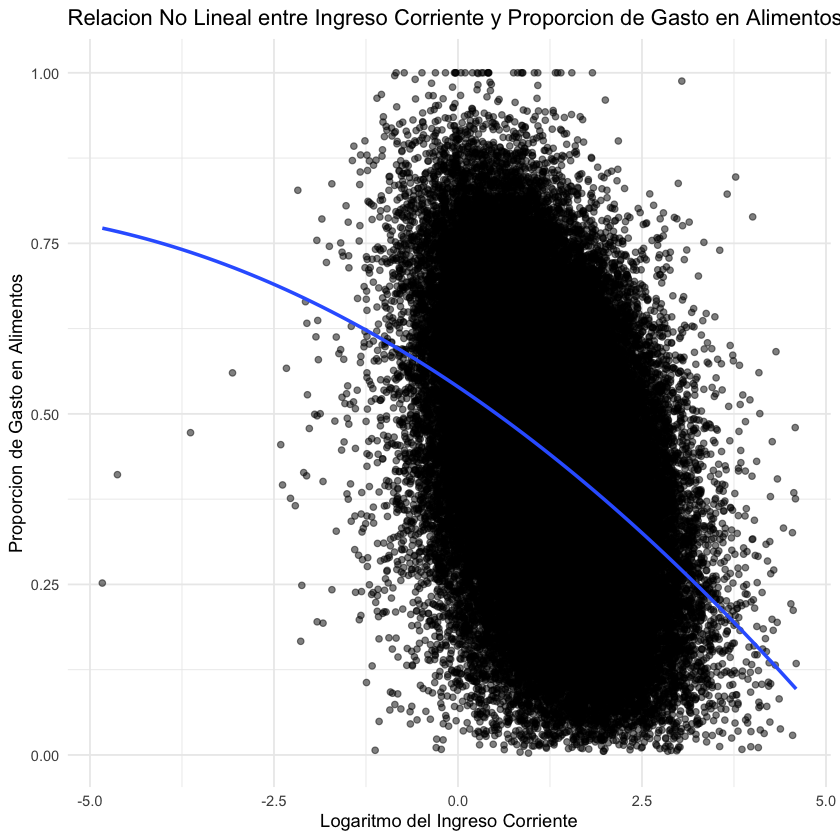

In [112]:
# Estimación con un término cuadrático para el ingreso
lm_nonlinear <- lm(prop_alimen ~ poly(log(ing_cor), 2), data = data_filtered)
summary(lm_nonlinear)

ggplot(data_filtered, aes(x = log(ing_cor), y = prop_alimen)) +
  geom_point(alpha = 0.5) +
  geom_smooth(method = "lm", formula = y ~ poly(x, 2), se = FALSE) +
  labs(title = "Relacion No Lineal entre Ingreso Corriente y Proporcion de Gasto en Alimentos",
       x = "Logaritmo del Ingreso Corriente",
       y = "Proporcion de Gasto en Alimentos") +
  theme_minimal()


- (b) Se te pide considerar la posibilidad de que la proporción del gasto en alimentos varía entre las diferentes entidades federativas.

- (i) Identifica la entidad federativa de cada hogar en la base de datos y crea una variable dummy cdmx que tome el valor de 1 si el hogar pertenece a la Ciudad de México (la clave de ubica loc inicia con el dígito 9) y 0 de lo contrario ¿Qué implicaciones tiene incluir la variable cdmx en su modelo y cómo podrían interpretar su relación con la proporción del gasto destinado a alimentos?

In [128]:

datos$ubica_geo <- as.character(datos$ubica_geo)

datos$cdmx <- ifelse(substr(datos$ubica_geo, 1, 1) == "9", 1, 0)

# Verificamos los primeros registros para asegurarnos de que la variable dummy se ha creado correctamente
head(datos[c("ubica_geo", "cdmx")])


,ubica_geo,cdmx
,<chr>,<dbl>
1,1001,0
2,1001,0
3,1001,0
4,1001,0
5,1001,0
6,1001,0


Implicaciones:
Control de Heterogeneidad Regional: La Ciudad de México es una entidad federativa única con características diferentes al resto del país, como mayores ingresos promedio y acceso a una variedad de alimentos

Costo de Vida y Acceso a Mercados: La Ciudad de México puede tener un costo de vida diferente, incluyendo el costo de los alimentos

Preferencias Culturales y Sociales: Los patrones de consumo pueden variar debido a diferencias culturales y sociales

Efectos de Políticas Públicas: La Ciudad de México podría tener programas de apoyo social y políticas públicas distintas que afecten

Si el coeficiente de cdmx en el modelo es positivo y estadísticamente significativo, podríamos interpretar que los hogares en la Ciudad de México, en promedio, dedican una mayor proporción de su gasto a alimentos comparado con hogares fuera de la Ciudad.

- (ii) Se te pide analizar el contraste de la proporción de gastos que se destina a los alimentos entre la CDMX y el Estado de México (la clave ubica loc
del EDOMEX inicia con los dígitos 15). Debes modificar la especificación del inciso anterior para reflejar este interés. Interpreta cómo esta nueva especificación te permite analizar y comparar los efectos específcios entre estas dos entidades vecinas.

In [130]:

datos$ubica_loc <- as.character(datos$ubica_geo)

# Crear la variable dummy para el EDOMEX
datos$edomex <- ifelse(substr(datos$ubica_loc, 1, 2) == "15", 1, 0)
model_gasto_alimentos <- lm(prop_alimen ~ cdmx + edomex + ing_cor + urbano + tot_integ + prop_mujeres + prop_menores, data = datos)

summary(model_gasto_alimentos)



Call:
lm(formula = prop_alimen ~ cdmx + edomex + ing_cor + urbano + 
    tot_integ + prop_mujeres + prop_menores, data = datos)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.4986 -0.1145 -0.0006  0.1120  5.0879 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.4979470  0.0018060 275.718  < 2e-16 ***
cdmx          0.0410707  0.0032967  12.458  < 2e-16 ***
edomex        0.0440532  0.0028119  15.667  < 2e-16 ***
ing_cor      -0.0047901  0.0000801 -59.801  < 2e-16 ***
urbano       -0.0429963  0.0011532 -37.284  < 2e-16 ***
tot_integ    -0.0013819  0.0003492  -3.957 7.58e-05 ***
prop_mujeres -0.0232931  0.0021982 -10.597  < 2e-16 ***
prop_menores  0.0169076  0.0032279   5.238 1.63e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1639 on 88221 degrees of freedom
Multiple R-squared:  0.06561,	Adjusted R-squared:  0.06554 
F-statistic:   885 on 7 and 88221 DF,  p-value: < 2.2e-16


Los resultados de la regresión muestran los siguientes coeficientes y significancias estadísticas para las variables de interés:

CDMX (0.0410707)*: El coeficiente positivo y significativo para CDMX indica que, manteniendo constantes todas las demás variables, los hogares en la Ciudad de México gastan aproximadamente un 4.1% más de su presupuesto en alimentos en comparación con los hogares fuera de estas dos entidades. La significancia estadística (p < 0.001) refuerza la confianza en este resultado.

EDOMEX (0.0440532)*: Similarmente, el coeficiente positivo y significativo para EDOMEX sugiere que los hogares en el Estado de México gastan aproximadamente un 4.4% más de su presupuesto en alimentos que los hogares fuera de estas dos entidades, controlando por las demás variables en el modelo. Este efecto también es estadísticamente significativo (p < 0.001).

Ambos coeficientes son positivos, lo que indica que tanto en la CDMX como en el EDOMEX, los hogares tienden a gastar una mayor proporción de su presupuesto en alimentos en comparación con otras regiones, siendo este efecto ligeramente más fuerte para los hogares en el Estado de México.

- (iii) A continuación, plantea y estima un modelo que incluya una interacción entre la variable dummy cdmx y el estrato socioeconómico para examinar si hay diferencias en la proporción del gasto en alimentos entre los hogares de la Ciudad de M´exico y los del resto del país, controlando por el tamaño del hogar y la presencia de menores. Reporta tus hallazgos en una tabla y proporciona una interpretación específica de los coeficientes asociados con la o las interacciones relevantes que hayas agregado. ¿Qué podrían sugerir
los coeficientes significativos de interacción?

In [138]:

library(dplyr)

datos <- datos %>%
  mutate(cdmx_est_socio2 = cdmx * est_socio2,
         cdmx_est_socio3 = cdmx * est_socio3,
         cdmx_est_socio4 = cdmx * est_socio4)

model_interaccion <- lm(prop_alimen ~ cdmx + est_socio2 + est_socio3 + est_socio4 +
                           cdmx_est_socio2 + cdmx_est_socio3 + cdmx_est_socio4 +
                           tot_integ + prop_menores,
                         data = datos)

# Mostrar los resultados en una tabla
stargazer(model_interaccion, type = "latex")



% Table created by stargazer v.5.2.3 by Marek Hlavac, Social Policy Institute. E-mail: marek.hlavac at gmail.com
% Date and time: Tue, Apr 09, 2024 - 05:58:07
\begin{table}[!htbp] \centering 
  \caption{} 
  \label{} 
\begin{tabular}{@{\extracolsep{5pt}}lc} 
\\[-1.8ex]\hline 
\hline \\[-1.8ex] 
 & \multicolumn{1}{c}{\textit{Dependent variable:}} \\ 
\cline{2-2} 
\\[-1.8ex] & prop\_alimen \\ 
\hline \\[-1.8ex] 
 cdmx & $-$0.015 \\ 
  & (0.073) \\ 
  & \\ 
 est\_socio2 & $-$0.060$^{***}$ \\ 
  & (0.001) \\ 
  & \\ 
 est\_socio3 & $-$0.112$^{***}$ \\ 
  & (0.002) \\ 
  & \\ 
 est\_socio4 & $-$0.154$^{***}$ \\ 
  & (0.003) \\ 
  & \\ 
 cdmx\_est\_socio2 & 0.069 \\ 
  & (0.073) \\ 
  & \\ 
 cdmx\_est\_socio3 & 0.074 \\ 
  & (0.074) \\ 
  & \\ 
 cdmx\_est\_socio4 & 0.055 \\ 
  & (0.074) \\ 
  & \\ 
 tot\_integ & $-$0.006$^{***}$ \\ 
  & (0.0003) \\ 
  & \\ 
 prop\_menores & 0.021$^{***}$ \\ 
  & (0.003) \\ 
  & \\ 
 Constant & 0.513$^{***}$ \\ 
  & (0.002) \\ 
  & \\ 
\hline \\[-1.8ex] 
Obs

![t](equation3.png)

- cdmx_est_socio2 (0.069): Este coeficiente sugiere que para los hogares en el estrato socioeconómico 2 de la CDMX, la diferencia en la proporción del gasto en alimentos en comparación con el estrato base aumenta en 6.9 puntos porcentuales.

- cdmx_est_socio3 (0.074): Similar al anterior, este coeficiente indica un incremento en la proporción del gasto en alimentos para los hogares del estrato socioeconómico 3 en la CDMX en comparación con el estrato base, con un aumento de 7.4 puntos porcentuales.

- cdmx_est_socio4 (0.055): Este coeficiente muestra un aumento de 5.5 puntos porcentuales en la proporción del gasto en alimentos para los hogares del estrato socioeconómico 4 en la CDMX en comparación con el base. 

- Interpretación de los coeficientes de interacción
    Aunque los coeficientes de interacción son positivos, indicando un aumento potencial en la proporción del gasto en alimentos para los hogares en diferentes estratos socioeconómicos de la CDMX en comparación con el resto del país, ninguno es estadísticamente significativo según los tamaños de los errores estándar. Esto sugiere que no hay suficiente evidencia en los datos para afirmar que la proporción del gasto en alimentos entre la CDMX y el resto del país varía significativamente según el estrato socioeconómico.

(c) Reflexionando sobre los desafíos de asegurar una dieta adecuada para los hogares en diferentes entornos, el gobierno desea investigar la interacción entre la urbanización y la estructura familiar, en particular, la presencia de menores. Desean comprender cómo la localización urbana o rural de un hogar y la cantidad de menores que viven en él pueden conjuntamente influir en la probabilidad de que el gasto alimentario por persona caiga por debajo del umbral definido por la FAO para una dieta saludable, lo cual se indica con la variable alerta.

- (i) Formulen una hipótesis nula (H0) que establezca que la relación entre la proporción de menores y la probabilidad de alerta no es heterogenea entre hogares en el sector urbano y rural. En este inciso debes indicar la especificación (sin controles adicionales) que estimarías y plantea la prueba de hipótesis que te interesa para resolver la pregunta.

Hipótesis nula (H0): La relación entre la proporción de menores en un hogar y la probabilidad de que el gasto alimentario por persona caiga por debajo del umbral de la FAO para una dieta saludable no varía entre hogares urbanos y rurales. Es decir, la urbanización no modifica el impacto de tener menores en el hogar sobre la probabilidad de alerta. Supongamos una regresión tal que:

alerta=β 
0
​
 +β 
1
​
 ⋅urbano+β 
2
​
 ⋅prop_menores+β 
3
​
 ⋅(urbano×prop_menores)+ε

La prueba de hipótesis que nos interesa es si el coeficiente β3 (el de interacción entre urbano y prop_menores) es igual a cero. Si el p-valor asociado con β3 es menor que un umbral de significancia, rechazaríamos la hipótesis nula, lo que indicaría que la relación entre la proporción de menores en un hogar y la probabilidad de caer por debajo del umbral de la FAO es diferente entre hogares urbanos y rurales.

- (ii) Estima la especificación del inciso anterior. Reporta el resultado gráficamente junto con un diagrama de dispersión como en el caso de la pregunta 2(b). Indica si se rechaza la prueba hipótesis de la pregunta anterior, y en caso de que así sea, ¿con que valor-p?


Call:
glm(formula = alerta ~ urbano * prop_menores, family = binomial(link = "logit"), 
    data = datos)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.7795   0.1718   0.4151   0.5825   0.5825  

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)          2.37437    0.02680  88.602  < 2e-16 ***
urbano              -0.68652    0.03067 -22.381  < 2e-16 ***
prop_menores         6.35643    0.26457  24.025  < 2e-16 ***
urbano:prop_menores -1.31387    0.29469  -4.458 8.25e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 52339  on 88228  degrees of freedom
Residual deviance: 47853  on 88225  degrees of freedom
AIC: 47861

Number of Fisher Scoring iterations: 7


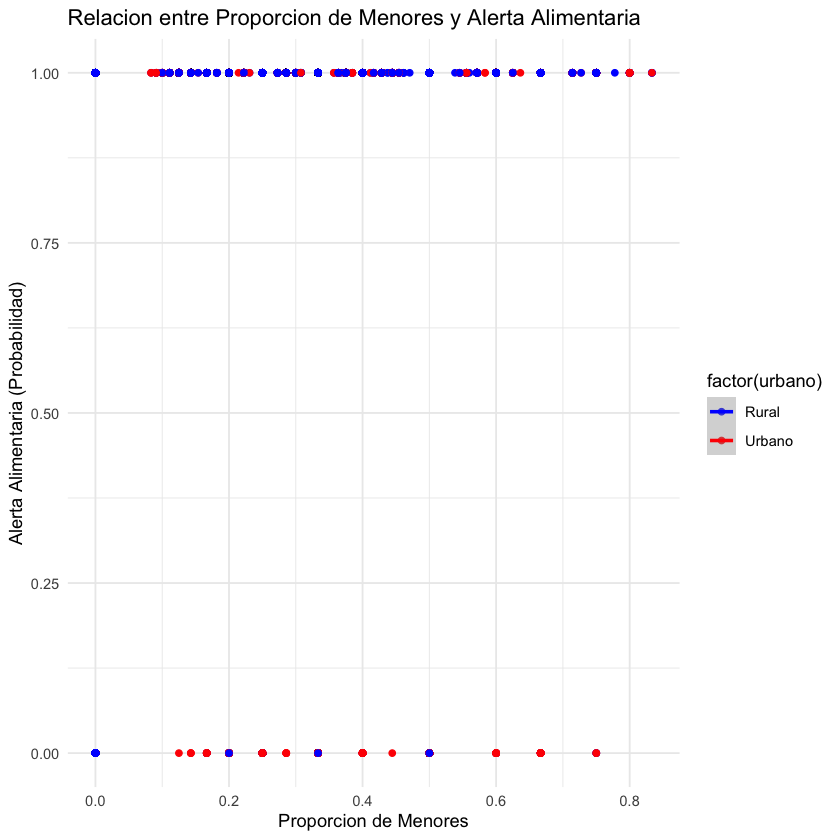

In [133]:
model <- glm(alerta ~ urbano * prop_menores, family = binomial(link = "logit"), data = datos)
summary(model)
library(ggplot2)

ggplot(datos, aes(x = prop_menores, y = alerta, color = factor(urbano))) +
  geom_point() +
  stat_smooth(method = "glm", method.args = list(family = binomial(link = "logit")), 
              aes(fill = factor(urbano)), formula = y ~ x * factor(urbano)) +
  labs(title = "Relacion entre Proporcion de Menores y Alerta Alimentaria",
       x = "Proporcion de Menores", y = "Alerta Alimentaria (Probabilidad)") +
  scale_color_manual(values = c("blue", "red"), labels = c("Rural", "Urbano")) +
  scale_fill_manual(values = c("lightblue", "pink"), labels = c("Rural", "Urbano")) +
  theme_minimal()

El p-value para la interacción entre urbano y prop_menores es 8.25e-06. Con un p-valor tan bajo, claramente rechazamos la hipótesis nula de que la relación entre la proporción de menores y la probabilidad de alerta es homogénea entre hogares urbanos y rurales.